In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticks
%matplotlib inline
import seaborn as sns
sns.set()
from scipy import stats
from sklearn import linear_model, metrics, model_selection, neighbors, naive_bayes, svm, preprocessing, feature_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [2]:
df = pd.read_csv('Healthcare_cleaned.csv')


In [3]:
df

,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,1,1,2,1,4,3,5,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,1,4,0,5,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,3,0,0,1,5,0,1,0,...,0,1,0,0,0,0,0,0,0,2
3,0,0,2,1,0,3,5,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,2,1,0,3,5,0,1,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3419,1,0,2,1,3,3,5,0,1,0,...,0,0,1,0,0,0,0,0,0,1
3420,1,0,2,1,3,3,34,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3421,1,0,2,1,3,3,3,1,0,0,...,0,0,1,0,0,0,0,0,0,1
3422,0,0,2,1,3,0,34,0,1,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

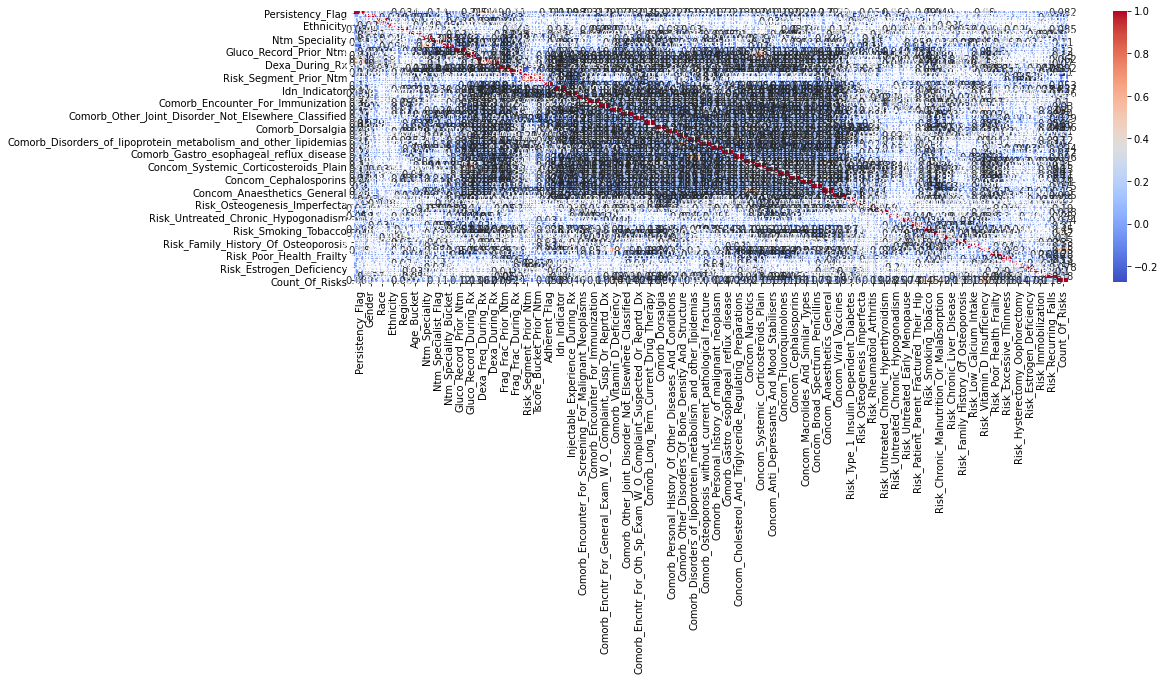

In [4]:
plt.figure(figsize = (16,5))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

# Machine learning 

# Baseline modeling

In [ ]:
# Baseline modeling

In [6]:
X = df.drop(['Persistency_Flag'],axis =1)
y = df['Persistency_Flag']

In [9]:
rs = np.random.RandomState(seed=20)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.4, shuffle=True, random_state=rs)
X_test, X_valid, y_test, y_valid = model_selection.train_test_split(X_test, y_test, test_size = 0.5, shuffle=True, random_state=rs)

## create our three sets: train, test and validation
## use a set seed to make this work repeatable

In [10]:
print(X_test.shape)
print(X_valid.shape)
print(X_train.shape)

## just sanity check that proportions are correct

(685, 63)
(685, 63)
(2054, 63)


In [11]:
baseline_predictions = [0 for x in y_valid]
metrics.accuracy_score(y_valid, baseline_predictions)
## baseline predicition not using any model to see probaility that the pateint is persistent to drug

0.6335766423357664

In [12]:
baseline_predictions = [1 for x in y_valid]
metrics.accuracy_score(y_valid, baseline_predictions)
## baseline predicition not using any model to see probaility that the pateint is not persistent to drug

0.36642335766423356

In [ ]:
RandomForestClassifier

In [53]:
classifiers = [GradientBoostingClassifier(),
               RandomForestClassifier(),
               neighbors.KNeighborsClassifier(),
               naive_bayes.GaussianNB(),
               naive_bayes.MultinomialNB(),
               linear_model.LogisticRegression(solver='lbfgs', multi_class='ovr', max_iter=9999),
               svm.LinearSVC(max_iter=9999),
               svm.SVC(kernel='rbf', gamma='auto', max_iter=9999)]
classifier_names = ['Gradient Boosting','Random Forest','KNN','Gaussian NB','Multinomial NB','Logistic','Linear SVM','Non-Linear SVM']
accuracies = []
for clf, name in zip(classifiers,classifier_names):
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_valid)
    acc = metrics.accuracy_score(predictions, y_valid)
    accuracies.append(acc)
models = pd.DataFrame({'model':classifier_names, 'baseline':accuracies})    
models

,model,baseline
0,Gradient Boosting,0.791241
1,Random Forest,0.808759
2,KNN,0.792701
3,Gaussian NB,0.379562
4,Multinomial NB,0.800000
5,Logistic,0.816058
6,Linear SVM,0.807299
7,Non-Linear SVM,0.807299


# Feature Scaling

In [14]:
scaler = preprocessing.MinMaxScaler()
X = scaler.fit_transform(X)

##Normalising the data to improve accuracy of model 

In [15]:
rs = np.random.RandomState(seed=20)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.4, shuffle=True, random_state=rs)
X_test, X_valid, y_test, y_valid = model_selection.train_test_split(X_test, y_test, test_size = 0.5, shuffle=True, random_state=rs)

## create our three sets: train, test and validation
## use a set seed to make this work repeatable
print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)

(2054, 63)
(685, 63)
(685, 63)


In [52]:
classifiers = [GradientBoostingClassifier(),
               RandomForestClassifier(),
               neighbors.KNeighborsClassifier(),
               naive_bayes.GaussianNB(),
               naive_bayes.MultinomialNB(),
               linear_model.LogisticRegression(solver='lbfgs', multi_class='ovr', max_iter=9999),
               svm.LinearSVC(max_iter=9999),
               svm.SVC(kernel='rbf', gamma='auto', max_iter=9999)]
classifier_names = ['Gradient Boosting','Random Forest','KNN','Gaussian NB','Multinomial NB','Logistic','Linear SVM','Non-Linear SVM']
accuracies = []
for clf, name in zip(classifiers,classifier_names):
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_valid)
    acc = metrics.accuracy_score(predictions, y_valid)
    accuracies.append(acc)
models = pd.DataFrame({'model':classifier_names, 'scaled':accuracies})    
models

## table showing baseline/accuracy when using model after scalling 'KNN','Gaussian NB','Multinomial NB','Logistic','Linear SVM' and'Non-Linear SVM'
## Logistic model seems to the most accurate.

,model,scaled
0,Gradient Boosting,0.791241
1,Random Forest,0.807299
2,KNN,0.792701
3,Gaussian NB,0.379562
4,Multinomial NB,0.800000
5,Logistic,0.816058
6,Linear SVM,0.807299
7,Non-Linear SVM,0.807299


# Feature Selection Method - Wrapper methods

In [17]:
columns = df.drop(['Persistency_Flag'],axis =1).columns.tolist()

num_to_keep = 5
best_features = []
for i in range(0, num_to_keep):
    best_acc = 0.0
    feature_to_add = ''
    for column in columns:
        feature_num = columns.index(column)
        if feature_num in best_features:
            continue
        features = best_features+[feature_num]
        clf = neighbors.KNeighborsClassifier()
        clf.fit(X_train[:,features], y_train)
        predictions = clf.predict(X_valid[:,features])
        acc = metrics.accuracy_score(predictions, y_valid)
        if acc > best_acc:
            best_acc = acc
            feature_to_add = feature_num
    best_features.append(feature_to_add)
print(best_features)
##using feature selection method getting best 5 features to use with KNN
##Dexa_During_Rx                                                      
##Dexa_Freq_During_Rx                                                 
##Frag_Frac_During_Rx 
##Race
##Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx

[11, 10, 13, 1, 24]


In [27]:
subset = [11,10,13,1,24]
clf = neighbors.KNeighborsClassifier()
clf.fit(X_train[:,subset], y_train)
predictions = clf.predict(X_valid[:,subset])
acc = metrics.accuracy_score(predictions, y_valid)
acc
##KNN model give 0.783 accuracy when using the five subset given by wrapper method

0.7839416058394161

In [28]:
columns = df.drop(['Persistency_Flag'],axis =1).columns.tolist()
num_to_keep = 5
best_features = []
for i in range(0, num_to_keep):
    best_acc = 0.0
    feature_to_add = ''
    for column in columns:
        feature_num = columns.index(column)
        if feature_num in best_features:
            continue
        features = best_features+[feature_num]
        clf = naive_bayes.GaussianNB()
        clf.fit(X_train[:,features], y_train)
        predictions = clf.predict(X_valid[:,features])
        acc = metrics.accuracy_score(predictions, y_valid)
        if acc > best_acc:
            best_acc = acc
            feature_to_add = feature_num
    best_features.append(feature_to_add)
print(best_features)
##using feature selection method getting best 5 features to use with GaussianNB

[10, 17, 4, 12, 14]


In [29]:
subset = [10,17,4,12,14]
clf = naive_bayes.GaussianNB()
clf.fit(X_train[:,subset], y_train)
predictions = clf.predict(X_valid[:,subset])
acc = metrics.accuracy_score(predictions, y_valid)
acc
##KNN model give 0.781 accuracy when using the five subset given by wrapper method

0.781021897810219

In [30]:
columns = df.drop(['Persistency_Flag'],axis =1).columns.tolist()
num_to_keep = 5
best_features = []
for i in range(0, num_to_keep):
    best_acc = 0.0
    feature_to_add = ''
    for column in columns:
        feature_num = columns.index(column)
        if feature_num in best_features:
            continue
        features = best_features+[feature_num]
        clf = linear_model.LogisticRegression()
        clf.fit(X_train[:,features], y_train)
        predictions = clf.predict(X_valid[:,features])
        acc = metrics.accuracy_score(predictions, y_valid)
        if acc > best_acc:
            best_acc = acc
            feature_to_add = feature_num
    best_features.append(feature_to_add)
print(best_features)
##using feature selection method getting best 5 features to use with Logistic Regression 

[10, 12, 0, 1, 11]


In [32]:
subset = [10,12,0,1,11]
clf = linear_model.LogisticRegression()
clf.fit(X_train[:,subset], y_train)
predictions = clf.predict(X_valid[:,subset])
acc = metrics.accuracy_score(predictions, y_valid)
acc
##Logistic model give 0.782 accuracy when using the five subset given by wrapper method

0.7824817518248175

In [47]:
columns = df.drop(['Persistency_Flag'],axis =1).columns.tolist()
num_to_keep = 5
best_features = []
for i in range(0, num_to_keep):
    best_acc = 0.0
    feature_to_add = ''
    for column in columns:
        feature_num = columns.index(column)
        if feature_num in best_features:
            continue
        features = best_features+[feature_num]
        clf = RandomForestClassifier()
        clf.fit(X_train[:,features], y_train)
        predictions = clf.predict(X_valid[:,features])
        acc = metrics.accuracy_score(predictions, y_valid)
        if acc > best_acc:
            best_acc = acc
            feature_to_add = feature_num
    best_features.append(feature_to_add)
print(best_features)
##using feature selection method getting best 5 features to use with Random Forest

[10, 12, 8, 44, 18]


In [48]:
subset = [10,12,8,44,18]
clf = RandomForestClassifier()
clf.fit(X_train[:,subset], y_train)
predictions = clf.predict(X_valid[:,subset])
acc = metrics.accuracy_score(predictions, y_valid)
acc
##Random Forest model give 0.782 accuracy when using the five subset given by wrapper method

0.7824817518248175

In [54]:
columns = df.drop(['Persistency_Flag'],axis =1).columns.tolist()
num_to_keep = 5
best_features = []
for i in range(0, num_to_keep):
    best_acc = 0.0
    feature_to_add = ''
    for column in columns:
        feature_num = columns.index(column)
        if feature_num in best_features:
            continue
        features = best_features+[feature_num]
        clf = GradientBoostingClassifier()
        clf.fit(X_train[:,features], y_train)
        predictions = clf.predict(X_valid[:,features])
        acc = metrics.accuracy_score(predictions, y_valid)
        if acc > best_acc:
            best_acc = acc
            feature_to_add = feature_num
    best_features.append(feature_to_add)
print(best_features)
##using feature selection method getting best 5 features to use with Gradient Boosting

[10, 17, 12, 0, 11]


In [56]:
subset = [10,17,12,0,11]
clf = GradientBoostingClassifier()
clf.fit(X_train[:,subset], y_train)
predictions = clf.predict(X_valid[:,subset])
acc = metrics.accuracy_score(predictions, y_valid)
acc
##Gradient Boosting model give 0.782 accuracy when using the five subset given by wrapper method

0.7824817518248175